# The Battle of Neighborhood - Part2

### Introduction & Bussiness justification

#### Background

The City of New York, is the most populous city in the United States. It is the financial capital of USA. This also means that the market is highly competitive. It provides lot of business oppourtunities and business friendly environment. It has attracted many different players into the market. It is a global hub of business and commerce. There are more than 2 million small businesses in New York state, which employ 4 million people. These small businesses make up 99.8% of all businesses within the state and employ more than half the state's workforce.

Toronto is also a very popular city of US. It is highly developed due to many IT industries nearby. Immigrants also find Toronto highly stable for living. Markets around Toronto are also very rich.There are around 1 million small business around Toronto, which employ 2 million people. 

 People from diverse area lives here. As it is highly developed city so cost of doing business is also one of the highest. With it’s diverse culture , comes diverse food items. There are many restaurants in New York City, each belonging to different categories like Chinese , Indian , French etc. We need to analyze which immigrants are more, so that we can get an idea about the resturant style.

#### Things to keep in mind: 

A restaurant is such a business where the business personel has to keep in mind customer demand based on the population type nearby. The popular cuisine nearby. The City of New York & Toronto is famous for its excelllent cuisine. It's food culture includes an array of international cuisines influenced by the city's immigrant history.

Central and Eastern European immigrants, especially Jewish immigrants - bagels, cheesecake, hot dogs etc
Italian immigrants -  pizza and Italian cuisine
Chinese , Asian and Middle Eastern restaurants- sandwich joints, lebanese, kababs and many more
mobile food vendors - Some 4,000 licensed by the city.

So it is evident that to survive in such competitive market it is very important to startegically plan. Various factors need to be studied inorder to decide on the Location such as :

New York Population including immigrants & natives.
Markets, Wholesale markets etc nearby so that the ingredients can be purchased fresh to maintain quality and cost.
venues like Gyms, Entertainmnet zones, Parks etc nearby where floating population is high etc
already established branded open resturants & food joints.
Varieties available there.
Segmentation of the Borough
Saturated markets etc
The list can go on...
Eventhough well funded,The Company need to choose the correct location to start its first venture.If this is successful they can plan about expantion, but the first foot step is needs to be very calculative.

#### Target Audience:

To recommend the correct location,Company has appointed the Data Science team. The objective is to locate and recommend to the management which neighborhood of Newyork city will be best choice to start a restaurant. The Management also expects the team to keep their demands in mind.
This would be a challenging job now to hit the correct audience.

#### Challenges to face:

We need to compare two cities with their geographical boundaries. We need to compare different data sets. We need to provide detailed analysis on different datasets.

### Prerequisites 

#### Data

1. NewYork DataSet :  https://geo.nyu.edu/catalog/nyu_2451_34572
2. Toronto DataSet : https://www.toronto.ca/city-government/data-research-maps/open-data/open-data-catalogue/#8c732154-5012-9afe-d0cd-ba3ffc813d5a
3. NewYork cuisine : https://en.wikipedia.org/wiki/Cuisine_of_New_York_City
4. Toronto cuisine : https://en.wikipedia.org/wiki/Cuisine_in_Toronto


In [2]:

import numpy as np
import pandas as pd
import datetime as dt # Datetime
import json # library to handle JSON files

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim

!conda install -c conda-forge folium=0.5.0 --yes
import folium #import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [3]:
# import package and its set of stopwords
!conda  install -c geopandas
!conda install -c conda-forge wordcloud==1.4.1 --yes
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import csv
mpl.style.use('ggplot') # optional: for ggplot-like style

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker

# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y
import seaborn as sns

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0


print ('Wordcloud is installed and imported!')


CondaValueError: too few arguments, must supply command line package specs or --file

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - wordcloud==1.4.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wordcloud-1.4.1            |           py36_0         324 KB  conda-forge

The following NEW packages will be INSTALLED:

    wordcloud: 1.4.1-py36_0 conda-forge


wordcloud-1.4.1      | 324 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    s

In [4]:

!conda install -c conda-forge adal --yes
import getopt
import sys
import json
import re
from adal import AuthenticationContext
from project_lib import project

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - adal


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pyjwt-1.7.1                |             py_0          17 KB  conda-forge
    adal-1.2.2                 |             py_0          32 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          50 KB

The following NEW packages will be INSTALLED:

    adal:  1.2.2-py_0 conda-forge
    pyjwt: 1.7.1-py_0 conda-forge


pyjwt-1.7.1          | 17 KB     | ##################################### | 100% 
adal-1.2.2           | 32 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [5]:
import matplotlib.cm as cm
import matplotlib.colors as colors

#### Importing Toronto data

In [6]:
from bs4 import BeautifulSoup
import lxml
import requests
toronto_url = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
print('Toronto data taken into account')


Toronto data taken into account


In [7]:
soup = BeautifulSoup(toronto_url.text, 'html.parser')
table=soup.find('table', attrs={'class':'wikitable sortable'})

#get headers:
headers=table.findAll('th')
for i, head in enumerate(headers): headers[i]=str(headers[i]).replace("<th>","").replace("</th>","").replace("\n","")

#Find all items and skip first one:
rows=table.findAll('tr')
rows=rows[1:len(rows)]

# skip all meta symbols and line feeds between rows:
for i, row in enumerate(rows): rows[i] = str(rows[i]).replace("\n</td></tr>","").replace("<tr>\n<td>","")

# make dataframe, expand rows and drop the old one:
toronto_df=pd.DataFrame(rows)
toronto_df[headers] = toronto_df[0].str.split("</td>\n<td>", n = 2, expand = True) 
toronto_df.drop(columns=[0],inplace=True)

In [8]:
# skip not assigned boroughs:
toronto_df = toronto_df.drop(toronto_df[(toronto_df.Borough == "Not assigned")].index)
# give "Not assigned" Neighborhoods same name as Borough:
toronto_df.Neighbourhood.replace("Not assigned", toronto_df.Borough, inplace=True)

# copy Borough value to Neighborhood if NaN:
toronto_df.Neighbourhood.fillna(toronto_df.Borough, inplace=True)
# drop duplicate rows:
toronto_df=toronto_df.drop_duplicates()

# extract titles from columns
toronto_df.update(
    toronto_df.Neighbourhood.loc[
        lambda x: x.str.contains('title')
    ].str.extract('title=\"([^\"]*)',expand=False))

toronto_df.update(
    toronto_df.Borough.loc[
        lambda x: x.str.contains('title')
    ].str.extract('title=\"([^\"]*)',expand=False))

# delete Toronto annotation from Neighbourhood:
toronto_df.update(
    toronto_df.Neighbourhood.loc[
        lambda x: x.str.contains('Toronto')
    ].str.replace(", Toronto",""))
toronto_df.update(
    toronto_df.Neighbourhood.loc[
        lambda x: x.str.contains('Toronto')
    ].str.replace("\(Toronto\)",""))

# combine multiple neighborhoods with the same post code
df2 = pd.DataFrame({'Postcode':toronto_df.Postcode.unique()})
df2['Borough']=pd.DataFrame(list(set(toronto_df['Borough'].loc[toronto_df['Postcode'] == x['Postcode']])) for i, x in df2.iterrows())
df2['Neighborhood']=pd.Series(list(set(toronto_df['Neighbourhood'].loc[toronto_df['Postcode'] == x['Postcode']])) for i, x in df2.iterrows())
df2['Neighborhood']=df2['Neighborhood'].apply(lambda x: ', '.join(x))
df2.dtypes

df2.head()

,Postcode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Regent Park
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park (Toronto),Queen's Park


In [9]:
dfll= pd.read_csv("http://cocl.us/Geospatial_data")
dfll.rename(columns={'Postal Code':'Postcode'}, inplace=True)
dfll.set_index("Postcode")
df2.set_index("Postcode")
toronto_data=pd.merge(df2, dfll)
toronto_data.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park (Toronto),Queen's Park,43.662301,-79.389494


#### map of Toronto with neighborhoods superimposed on top

In [10]:
address = 'Toronto, ON, Canada'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto, ON, Canada are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto, ON, Canada are 43.653963, -79.387207.


In [11]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Borough'], toronto_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto


Display the number of Boroughs and Neighborhoods

In [12]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(toronto_data['Borough'].unique()),
        toronto_data.shape[0]
    )
)

The dataframe has 12 boroughs and 103 neighborhoods.


In [13]:
toronto_df = toronto_data[toronto_data['Borough'].str.contains('Toronto')].reset_index(drop=True)
toronto_df.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636
1,M7A,Queen's Park (Toronto),Queen's Park,43.662301,-79.389494
2,M9A,Downtown Toronto,Queen's Park,43.667856,-79.532242
3,M1B,"Scarborough, Toronto","Rouge, Malvern",43.806686,-79.194353
4,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [14]:
toronto_df['Borough'].unique()

array(['Downtown Toronto', "Queen's Park (Toronto)",
       'Scarborough, Toronto', 'East Toronto', 'West Toronto',
       'York, Toronto', 'Central Toronto'], dtype=object)

In [15]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(toronto_df['Borough'].unique()),
        toronto_df.shape[0]
    )
)

The dataframe has 7 boroughs and 60 neighborhoods.


#### Toronto cuisine

In [16]:
latitude = 43.6532
longitude = 79.3832

print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 43.6532, 79.3832.


In [17]:
# The code was removed by Watson Studio for sharing.

In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [19]:
LIMIT = 100
toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park
Lawrence Manor, Lawrence Heights
Queen's Park 
Queen's Park 
Rouge, Malvern
Don Mills North
Woodbine Gardens, Parkview Hill
Garden District, Ryerson
Glencairn
Islington, West Deane Park, Martin Grove, Cloverdale, Princess Gardens
Highland Creek , Port Union, Rouge Hill
Don Mills South, Flemingdon Park
Woodbine Heights
St. James Town
Humewood-Cedarvale
Bloordale Gardens, Old Burnhamthorpe, Markland Wood, Eringate
West Hill, Morningside, Guildwood
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Downsview North, Wilson Heights
Thorncliffe Park
King, Richmond, Adelaide
Dovercourt Village, Dufferin
Scarborough Village
Oriole, Fairview, Henry Farm
Northwood Park, York University
East Toronto
Union Station , Harbourfront East, Toronto Islands
Trinity–Bellwoods, Little Portugal
Ionview, East Birchmount Park, Kennedy Park
Bayview Village
CFB Toronto, Downsview East
The Danfo

In [20]:
print(toronto_venues.shape)
toronto_venues.head()

(2216, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Careful & Reliable Painting,43.752622,-79.331957,Construction & Landscaping
2,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
3,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop


Venues in each neighborhood

In [21]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,5,5,5,5,5,5
"Albion Gardens, Humbergate, Mount Olive-Silverstone-Jamestown, Thistletown, Beaumond Heights, South Steeles, Silverstone",8,8,8,8,8,8
"Alderwood, Long Branch",10,10,10,10,10,10
"Bathurst Manor, Downsview North, Wilson Heights",20,20,20,20,20,20
Bayview Village,4,4,4,4,4,4
Berczy Park,56,56,56,56,56,56
"Birch Cliff, Cliffside West",4,4,4,4,4,4
"Bloordale Gardens, Old Burnhamthorpe, Markland Wood, Eringate",8,8,8,8,8,8
"Brockton, Parkdale Village, Exhibition Place",24,24,24,24,24,24


In [22]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 269 uniques categories.


### Analyzing neighborhoods

In [23]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
venue_counts_toronto = toronto_onehot.groupby('Neighborhood').sum()
venue_counts_toronto.head(5)

,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Agincourt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Albion Gardens, Humbergate, Mount Olive-Silverstone-Jamestown, Thistletown, Beaumond Heights, South Steeles, Silverstone",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Alderwood, Long Branch",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Bathurst Manor, Downsview North, Wilson Heights",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Bayview Village,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


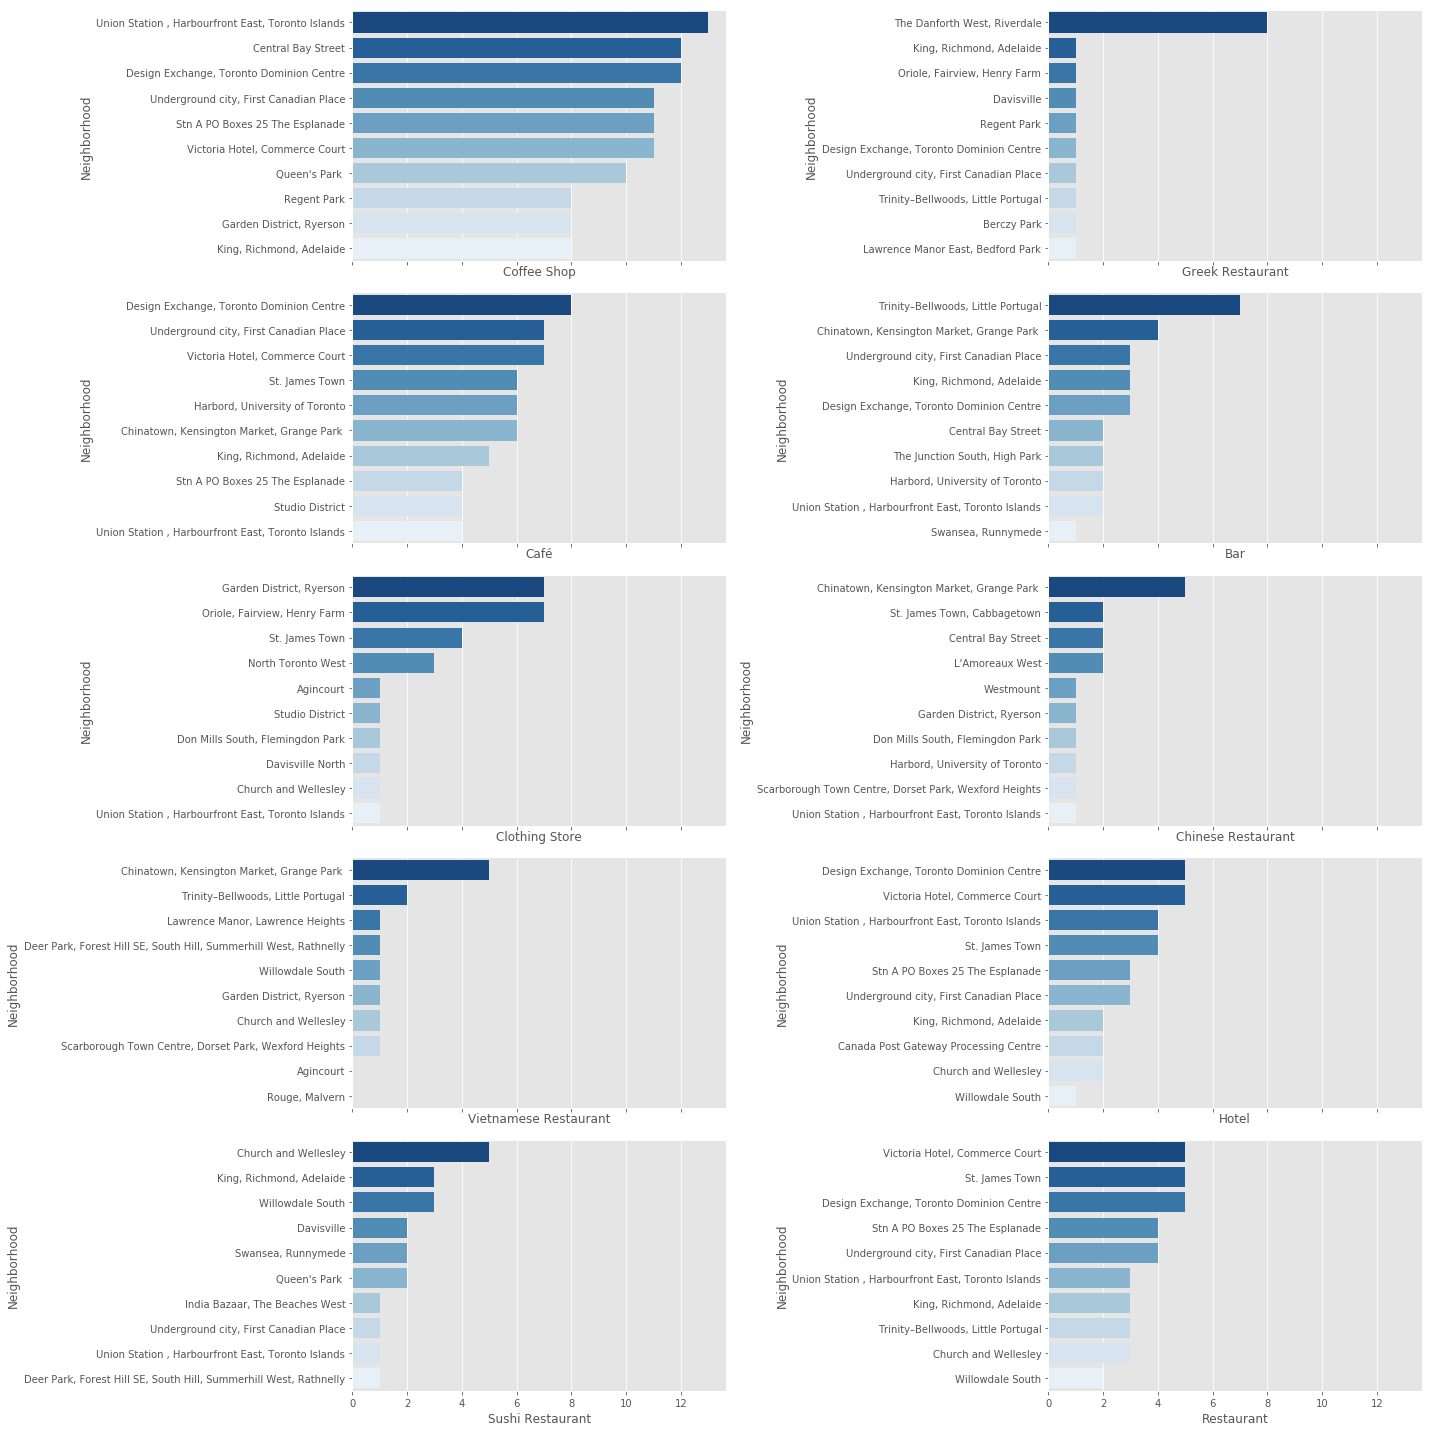

In [28]:
venue_counts_described_toronto = venue_counts_toronto.describe().transpose()
toronto_venue_top10 = venue_counts_described_toronto.sort_values('max', ascending=False)[0:10]
toronto_venue_top10
toronto_venue_top10_list = toronto_venue_top10.index.values.tolist()

import seaborn as sns
import matplotlib.pyplot as plt

fig, axes =plt.subplots(5, 2, figsize=(20,20), sharex=True)
axes = axes.flatten()

for ax, category in zip(axes, toronto_venue_top10_list):
    data = venue_counts_toronto[[category]].sort_values([category], ascending=False)[0:10]
    pal = sns.color_palette("Blues", len(data))
    sns.barplot(x=category, y=data.index, data=data, ax=ax, palette=np.array(pal[::-1]))

plt.tight_layout()
plt.show();


In [29]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head()

,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1,"Albion Gardens, Humbergate, Mount Olive-Silver...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
2,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
3,"Bathurst Manor, Downsview North, Wilson Heights",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
4,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0


The Elbow Method

In [32]:
from sklearn.cluster import KMeans
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)
sum_of_squared_distances = []
K = range(1,50)
for k in K:
    print(k, end=' ')
    kmeans = KMeans(n_clusters=k).fit(toronto_grouped_clustering)
    sum_of_squared_distances.append(kmeans.inertia_)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

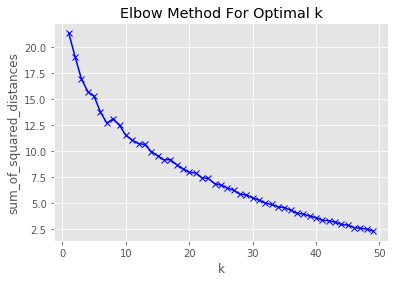

In [33]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal k');

In [46]:
num_top_venues = 10

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                        venue  freq
0              Clothing Store   0.2
1                      Lounge   0.2
2              Breakfast Spot   0.2
3                Skating Rink   0.2
4   Latin American Restaurant   0.2
5               Metro Station   0.0
6  Modern European Restaurant   0.0
7           Mobile Phone Shop   0.0
8          Miscellaneous Shop   0.0
9   Middle Eastern Restaurant   0.0


----Albion Gardens, Humbergate, Mount Olive-Silverstone-Jamestown, Thistletown, Beaumond Heights, South Steeles, Silverstone----
                       venue  freq
0              Grocery Store  0.25
1                   Pharmacy  0.12
2                Pizza Place  0.12
3       Fast Food Restaurant  0.12
4             Sandwich Place  0.12
5        Fried Chicken Joint  0.12
6                 Beer Store  0.12
7              Metro Station  0.00
8         Miscellaneous Shop  0.00
9  Middle Eastern Restaurant  0.00


----Alderwood, Long Branch----
                venue  freq
0        

In [60]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [61]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Lounge,Latin American Restaurant,Skating Rink,Clothing Store,Breakfast Spot,Dumpling Restaurant,Discount Store,Dog Run,Doner Restaurant,Donut Shop
1,"Albion Gardens, Humbergate, Mount Olive-Silver...",Grocery Store,Fried Chicken Joint,Pharmacy,Pizza Place,Fast Food Restaurant,Beer Store,Sandwich Place,Doner Restaurant,Dim Sum Restaurant,Diner
2,"Alderwood, Long Branch",Pizza Place,Coffee Shop,Sandwich Place,Dance Studio,Pub,Athletics & Sports,Skating Rink,Pharmacy,Gym,Dessert Shop
3,"Bathurst Manor, Downsview North, Wilson Heights",Coffee Shop,Sushi Restaurant,Chinese Restaurant,Sandwich Place,Bridal Shop,Fast Food Restaurant,Diner,Restaurant,Deli / Bodega,Bank
4,Bayview Village,Café,Chinese Restaurant,Bank,Japanese Restaurant,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dim Sum Restaurant


### Cluster Neighborhoods

In [62]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 7

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [63]:
neighborhoods_venues_sorted.insert(0, 'Cluster_Labels', kmeans.labels_)

toronto_merged = toronto_data

toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
toronto_merged.drop([16], inplace=True)
toronto_merged.reset_index()

toronto_merged

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,3.0,Park,Construction & Landscaping,Food & Drink Shop,Women's Store,Drugstore,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop
1,M4A,North York,Victoria Village,43.725882,-79.315572,0.0,Portuguese Restaurant,Pizza Place,Coffee Shop,Hockey Arena,Women's Store,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant
2,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636,0.0,Coffee Shop,Park,Bakery,Pub,Restaurant,Café,Mexican Restaurant,Ice Cream Shop,Chocolate Shop,Shoe Store
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,0.0,Furniture / Home Store,Coffee Shop,Sporting Goods Shop,Miscellaneous Shop,Athletics & Sports,Arts & Crafts Store,Clothing Store,Women's Store,Boutique,Vietnamese Restaurant
4,M7A,Queen's Park (Toronto),Queen's Park,43.662301,-79.389494,0.0,Coffee Shop,Diner,Park,Sushi Restaurant,Gym,Hobby Shop,Portuguese Restaurant,Smoothie Shop,Seafood Restaurant,Sandwich Place
5,M9A,Downtown Toronto,Queen's Park,43.667856,-79.532242,0.0,Coffee Shop,Diner,Park,Sushi Restaurant,Gym,Hobby Shop,Portuguese Restaurant,Smoothie Shop,Seafood Restaurant,Sandwich Place
6,M1B,"Scarborough, Toronto","Rouge, Malvern",43.806686,-79.194353,0.0,Fast Food Restaurant,Print Shop,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Drugstore,Department Store
7,M3B,North York,Don Mills North,43.745906,-79.352188,0.0,Gym / Fitness Center,Caribbean Restaurant,Japanese Restaurant,Baseball Field,Café,Convenience Store,Cosmetics Shop,Falafel Restaurant,Event Space,Ethiopian Restaurant
8,M4B,East York,"Woodbine Gardens, Parkview Hill",43.706397,-79.309937,0.0,Fast Food Restaurant,Pizza Place,Gastropub,Pet Store,Pharmacy,Breakfast Spot,Intersection,Bank,Athletics & Sports,Gym / Fitness Center
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0.0,Coffee Shop,Clothing Store,Cosmetics Shop,Café,Middle Eastern Restaurant,Pizza Place,Lingerie Store,Tea Room,Italian Restaurant,Theater


In [64]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        #color=rainbow[int(cluster)-1],
        fill=True,
        #fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine Clusters

Now, examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, assign a name to each cluster.



In [71]:

required_column_indices = [1,6,7]
required_column = [list(toronto_merged.columns.values)[i] for i in required_column_indices]
required_column_indices = [1,6,7]

Cluster 0

In [72]:
cluster0 = toronto_merged.loc[toronto_merged['Cluster_Labels'] == 0, toronto_merged.columns[1:12]]
cluster0.head(5)

,Borough,Neighborhood,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
1,North York,Victoria Village,43.725882,-79.315572,0.0,Portuguese Restaurant,Pizza Place,Coffee Shop,Hockey Arena,Women's Store,Dim Sum Restaurant
2,Downtown Toronto,Regent Park,43.654260,-79.360636,0.0,Coffee Shop,Park,Bakery,Pub,Restaurant,Café
3,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,0.0,Furniture / Home Store,Coffee Shop,Sporting Goods Shop,Miscellaneous Shop,Athletics & Sports,Arts & Crafts Store
4,Queen's Park (Toronto),Queen's Park,43.662301,-79.389494,0.0,Coffee Shop,Diner,Park,Sushi Restaurant,Gym,Hobby Shop
5,Downtown Toronto,Queen's Park,43.667856,-79.532242,0.0,Coffee Shop,Diner,Park,Sushi Restaurant,Gym,Hobby Shop


In [73]:
for col in required_column:
    print(cluster0[col].value_counts(ascending = False))
    print("---------------------------------------------")

Downtown Toronto          18
North York                17
Scarborough, Toronto      13
Etobicoke                  8
West Toronto               6
Central Toronto            6
East Toronto               5
East York                  4
York, Toronto              2
Mississauga                1
Queen's Park (Toronto)     1
Name: Borough, dtype: int64
---------------------------------------------
Coffee Shop                  19
Café                          9
Grocery Store                 5
Pizza Place                   4
Fast Food Restaurant          3
Discount Store                2
Trail                         2
Sandwich Place                2
Clothing Store                2
Lounge                        2
Bakery                        2
Light Rail Station            1
Gym                           1
Drugstore                     1
Beer Store                    1
Home Service                  1
Board Shop                    1
Dance Studio                  1
Greek Restaurant              1

Cluster 1

In [74]:
cluster1 = toronto_merged.loc[toronto_merged['Cluster_Labels'] == 1, toronto_merged.columns[1:12]]
cluster1.head(5)

,Borough,Neighborhood,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
32,"Scarborough, Toronto",Scarborough Village,43.744734,-79.239476,1.0,Playground,Women's Store,Drugstore,Dim Sum Restaurant,Diner,Discount Store
83,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160,1.0,Restaurant,Playground,Women's Store,Donut Shop,Dim Sum Restaurant,Diner


In [75]:
for col in required_column:
    print(cluster1[col].value_counts(ascending = False))
    print("---------------------------------------------")

Scarborough, Toronto    1
Central Toronto         1
Name: Borough, dtype: int64
---------------------------------------------
Playground    1
Restaurant    1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Playground       1
Women's Store    1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------


Cluster 2

In [76]:
cluster2 = toronto_merged.loc[toronto_merged['Cluster_Labels'] == 2, toronto_merged.columns[1:12]]
cluster2.head(5)

,Borough,Neighborhood,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
12,"Scarborough, Toronto","Highland Creek , Port Union, Rouge Hill",43.784535,-79.160497,2.0,Moving Target,Bar,Women's Store,Drugstore,Discount Store,Dog Run


In [77]:
for col in required_column:
    print(cluster2[col].value_counts(ascending = False))
    print("---------------------------------------------")

Scarborough, Toronto    1
Name: Borough, dtype: int64
---------------------------------------------
Moving Target    1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Bar    1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------


Cluster 3

In [78]:
cluster3 = toronto_merged.loc[toronto_merged['Cluster_Labels'] == 3, toronto_merged.columns[1:12]]
cluster3.head(5)

,Borough,Neighborhood,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
0,North York,Parkwoods,43.753259,-79.329656,3.0,Park,Construction & Landscaping,Food & Drink Shop,Women's Store,Drugstore,Diner
21,York,Caledonia-Fairbanks,43.689026,-79.453512,3.0,Park,Market,Women's Store,Fast Food Restaurant,Golf Course,Ethiopian Restaurant
35,East York,East Toronto,43.685347,-79.338106,3.0,Park,Coffee Shop,Convenience Store,Ethiopian Restaurant,Event Space,Empanada Restaurant
40,North York,"CFB Toronto, Downsview East",43.737473,-79.464763,3.0,Park,Airport,Dumpling Restaurant,Diner,Discount Store,Dog Run
61,Central Toronto,Lawrence Park,43.728020,-79.388790,3.0,Park,Swim School,Bus Line,Drugstore,Discount Store,Dog Run


In [79]:
for col in required_column:
    print(cluster3[col].value_counts(ascending = False))
    print("---------------------------------------------")

North York              3
Etobicoke               2
York                    1
East York               1
Downtown Toronto        1
Central Toronto         1
York, Toronto           1
Scarborough, Toronto    1
Name: Borough, dtype: int64
---------------------------------------------
Park     10
River     1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Playground                    2
Airport                       1
Women's Store                 1
Pizza Place                   1
Pool                          1
Coffee Shop                   1
Construction & Landscaping    1
Market                        1
Bank                          1
Swim School                   1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------


Cluster 4

In [80]:
cluster4 = toronto_merged.loc[toronto_merged['Cluster_Labels'] == 4, toronto_merged.columns[1:12]]
cluster4.head(5)

,Borough,Neighborhood,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
53,North York,Downsview Central,43.728496,-79.495697,4.0,Food Truck,Baseball Field,Women's Store,Drugstore,Discount Store,Dog Run
57,North York,"Emery, Humberlea",43.724766,-79.532242,4.0,Baseball Field,Women's Store,Dumpling Restaurant,Discount Store,Dog Run,Doner Restaurant
101,Etobicoke,"Old Mill, Kingsway Park South East, Sunnylea, ...",43.636258,-79.498509,4.0,Baseball Field,Women's Store,Dumpling Restaurant,Discount Store,Dog Run,Doner Restaurant


In [82]:
for col in required_column:
    print(cluster4[col].value_counts(ascending = False))
    print("---------------------------------------------")

North York    2
Etobicoke     1
Name: Borough, dtype: int64
---------------------------------------------
Baseball Field    2
Food Truck        1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Women's Store     2
Baseball Field    1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------


Cluster 5 

In [83]:
cluster5 = toronto_merged.loc[toronto_merged['Cluster_Labels'] == 5, toronto_merged.columns[1:12]]
cluster5.head(5)

,Borough,Neighborhood,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
62,Central Toronto,Roselawn,43.711695,-79.416936,5.0,Garden,Women's Store,Drugstore,Diner,Discount Store,Dog Run


In [84]:
for col in required_column:
    print(cluster5[col].value_counts(ascending = False))
    print("---------------------------------------------")

Central Toronto    1
Name: Borough, dtype: int64
---------------------------------------------
Garden    1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Women's Store    1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------


Cluster 6

In [85]:
cluster6 = toronto_merged.loc[toronto_merged['Cluster_Labels'] == 6, toronto_merged.columns[1:12]]
cluster6.head(5)

,Borough,Neighborhood,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
45,North York,"York Mills, Silver Hills",43.75749,-79.374714,6.0,Cafeteria,Women's Store,Falafel Restaurant,Event Space,Ethiopian Restaurant,Empanada Restaurant


In [87]:
for col in required_column:
    print(cluster6[col].value_counts(ascending = False))
    print("---------------------------------------------")

North York    1
Name: Borough, dtype: int64
---------------------------------------------
Cafeteria    1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Women's Store    1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------


### Importing New York Data

In [88]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [49]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded')

Data downloaded


In [52]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [53]:
neighborhoods_data = newyork_data['features']

In [54]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [55]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [56]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [57]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [58]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [59]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [60]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

####  map of New York with neighborhoods superimposed on top

####  a brief summary of unique Borough we have from both dataframe and total rows.

In [61]:
print('The data set from New York has rows : ',format(neighborhoods.count().unique()))
print('The data set from Toronto has rows : ',format(toronto_data.count().unique()))

print('New York has boroughs: ',format(len(neighborhoods['Borough'].unique())))
print('Toronto has boroughs: ',format(len(toronto_data['Borough'].unique())))

The data set from New York has rows :  [306]
The data set from Toronto has rows :  [103]
New York has boroughs:  5
Toronto has boroughs:  12


#### Foursquare API initialisation

In [62]:
# The code was removed by Watson Studio for sharing.

Your credentails:
CLIENT_ID: TI4KLLRUWUD3J544X5L1JHQ4YEDAWGKV5JJNBWQXAYH0ZENG
CLIENT_SECRET:KGOWK0Z0NN5OBR43KZDGUVXRRT4JEOWIYWHKHFMFUN4TFPLF


In [63]:
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from folium import plugins

#### Fetch Foursquare Venue Category Hierarchy

In [64]:
url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)
category_results = requests.get(url).json()

In [65]:
for key, value in category_results['response']['categories'][0].items():
    print(key, len(str(value)))

id 24
name 20
pluralName 20
shortName 20
icon 98
categories 15910


In [66]:
category_list = category_results['response']['categories']

In [67]:
len(category_list)

10

In [68]:
for data in category_list:
    print(data['id'], data['name'])

4d4b7104d754a06370d81259 Arts & Entertainment
4d4b7105d754a06372d81259 College & University
4d4b7105d754a06373d81259 Event
4d4b7105d754a06374d81259 Food
4d4b7105d754a06376d81259 Nightlife Spot
4d4b7105d754a06377d81259 Outdoors & Recreation
4d4b7105d754a06375d81259 Professional & Other Places
4e67e38e036454776db1fb3a Residence
4d4b7105d754a06378d81259 Shop & Service
4d4b7105d754a06379d81259 Travel & Transport



Food & It's Sub-Categories

Let's create a function to return a dictionary with Ids' & Names of Food & It's Sub-Categories.

In [69]:
# function to flatten a 'parent_id' category, returns all categories if checkParentID = False
def flatten_Hierarchy(category_list, checkParentID, category_dict, parent_id = ''):
    for data in category_list:
        
        if checkParentID == True and data['id'] == parent_id:
            category_dict[data['id']] = data['name']
            flatten_Hierarchy(category_list = data['categories'], checkParentID = False, category_dict = category_dict)
        
        elif checkParentID == False:
            category_dict[data['id']] = data['name']
            if len(data['categories']) != 0:
                flatten_Hierarchy(category_list = data['categories'], checkParentID = False, category_dict = category_dict)
    
    return category_dict

In [70]:
# this function takes the parent ID and returns 'name' and 'id' of all the sub-categories
category_dict = flatten_Hierarchy(category_list, checkParentID=True, category_dict = {}, parent_id = '4d4b7105d754a06374d81259')

In [71]:
neighborhoods.loc[0, 'Neighborhood']


'Wakefield'

In [72]:
neighborhood_latitude = neighborhoods.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = neighborhoods.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = neighborhoods.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Wakefield are 40.89470517661, -73.84720052054902.


In [73]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
categoryId = '4d4b7105d754a06374d81259' # category ID for "Food"

# create URL

url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius,
    categoryId,
    LIMIT)
url 

'https://api.foursquare.com/v2/venues/search?&client_id=TI4KLLRUWUD3J544X5L1JHQ4YEDAWGKV5JJNBWQXAYH0ZENG&client_secret=KGOWK0Z0NN5OBR43KZDGUVXRRT4JEOWIYWHKHFMFUN4TFPLF&v=20180605&ll=40.89470517661,-73.84720052054902&radius=500&categoryId=4d4b7105d754a06374d81259&limit=100'

In [74]:
results = requests.get(url).json()

In [75]:
results['response']['venues']


[{'id': '4e440828a809d4ed1bb7059f',
  'name': 'Pitman Deli',
  'location': {'address': '2020 Pitman Ave',
   'crossStreet': 'DeReimer Ave',
   'lat': 40.89414920073695,
   'lng': -73.84574821662589,
   'labeledLatLngs': [{'label': 'display',
     'lat': 40.89414920073695,
     'lng': -73.84574821662589}],
   'distance': 136,
   'postalCode': '10466',
   'cc': 'US',
   'city': 'Bronx',
   'state': 'NY',
   'country': 'United States',
   'formattedAddress': ['2020 Pitman Ave (DeReimer Ave)',
    'Bronx, NY 10466',
    'United States']},
  'categories': [{'id': '4d4b7105d754a06374d81259',
    'name': 'Food',
    'pluralName': 'Food',
    'shortName': 'Food',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1577358138',
  'hasPerk': False},
 {'id': '4c537892fd2ea593cb077a28',
  'name': 'Lollipops Gelato',
  'location': {'address': '4120 Baychester Ave',
   'crossStreet': 'Edenwald & Bussing Ave'

In [76]:
categoryId_list = []
for key, value in category_dict.items():
    categoryId_list.append(key)
categoryId = ','.join(categoryId_list)

In [77]:
def getNearbyFood(names, latitudes, longitudes, radius=1000, LIMIT=500):
    not_found = 0
    print('***Start ', end='')
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(' .', end='')
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            "4d4b7105d754a06374d81259", # "Food" category id
            LIMIT)
            
        try:
            # make the GET request
            results = requests.get(url).json()['response']['venues']
            
            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['name'], 
                v['location']['lat'], 
                v['location']['lng'],  
                v['categories'][0]['name']) for v in results])
        except:
            not_found += 1


    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    print("\nDone*** with {} venues with incompelete information.".format(not_found))
    return(nearby_venues)

In [78]:

import pickle # to serialize and deserialize a Python object structure
try:
    with open('nyc_food_venues.pkl', 'rb') as f:
        nyc_venues = pickle.load(f)
    print("---Dataframe Existed and Deserialized---")
except:
    nyc_venues = getNearbyFood(names=neighborhoods['Neighborhood'],
                                        latitudes=neighborhoods['Latitude'],
                                        longitudes=neighborhoods['Longitude']
                                       )
    with open('nyc_food_venues.pkl', 'wb') as f:
        pickle.dump(nyc_venues, f)
    print("---Dataframe Created and Serialized---")

***Start  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Done*** with 0 venues with incompelete information.
---Dataframe Created and Serialized---


#### Analysis

In [79]:
print(nyc_venues.shape)
nyc_venues.head()

(13952, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Pitman Deli,40.894149,-73.845748,Food
1,Wakefield,40.894705,-73.847201,Dunkin',40.890459,-73.849089,Donut Shop
2,Wakefield,40.894705,-73.847201,Burger King,40.895540,-73.856460,Fast Food Restaurant
3,Wakefield,40.894705,-73.847201,Cooler Runnings Jamaican Restaurant Inc,40.898083,-73.850259,Caribbean Restaurant
4,Wakefield,40.894705,-73.847201,Dunkin',40.893064,-73.856977,Donut Shop


Let's find out how many unique categories can be curated from all the returned venues

In [80]:
print('There are {} uniques categories.'.format(len(nyc_venues['Venue Category'].unique())))
nyc_venues.groupby('Venue Category')['Venue Category'].count().sort_values(ascending=False)

There are 193 uniques categories.


Venue Category
Deli / Bodega                               1058
Pizza Place                                 1040
Coffee Shop                                  938
Donut Shop                                   657
Fast Food Restaurant                         628
Chinese Restaurant                           620
Bakery                                       555
Italian Restaurant                           551
American Restaurant                          463
Café                                         409
Bagel Shop                                   351
Caribbean Restaurant                         341
Mexican Restaurant                           332
Sandwich Place                               317
Diner                                        284
Fried Chicken Joint                          278
Ice Cream Shop                               238
Restaurant                                   227
Food                                         218
Burger Joint                                 185
Asian

In [81]:
unique_categories = nyc_venues['Venue Category'].unique().tolist()
print(', '.join(str(x) for x in unique_categories))



Food, Donut Shop, Fast Food Restaurant, Caribbean Restaurant, Comfort Food Restaurant, Deli / Bodega, Fried Chicken Joint, Ice Cream Shop, Pizza Place, Food Truck, Chinese Restaurant, Latin American Restaurant, Bagel Shop, Restaurant, Bakery, Coffee Shop, Spanish Restaurant, Mexican Restaurant, Gastropub, Seafood Restaurant, Dumpling Restaurant, Frozen Yogurt Shop, American Restaurant, Steakhouse, BBQ Joint, Italian Restaurant, Burger Joint, Diner, Juice Bar, Café, Wings Joint, Grocery Store, Breakfast Spot, Asian Restaurant, Greek Restaurant, Sandwich Place, Japanese Restaurant, Indian Restaurant, Bar, Tapas Restaurant, Vegetarian / Vegan Restaurant, New American Restaurant, German Restaurant, Cuban Restaurant, Lounge, Pub, Sushi Restaurant, Cafeteria, Salvadoran Restaurant, Gas Station, Other Nightlife, Soup Place, Southern / Soul Food Restaurant, Food Court, Hot Dog Joint, Arcade, Dessert Shop, French Restaurant, Convenience Store, Food & Drink Shop, Empanada Restaurant, Mediterrane

In [82]:
# manually create a list of generalized categories
general_categories = ['Dessert Shop','Food','Ice Cream Shop','Donut Shop','Bakery','Sandwich Place','Comfort Food Restaurant',
                    'Deli / Bodega','Food Truck','Bagel Shop','Burger Joint','Restaurant','Frozen Yogurt Shop','Coffee Shop',
                    'Diner','Wings Joint','Café','Juice Bar','Breakfast Spot','Grocery Store','Bar','Cupcake Shop',
                    'Pub','Fish & Chips Shop','Cafeteria','Other Nightlife','Arcade','Hot Dog Joint','Food Court',
                    'Health Food Store','Convenience Store','Food & Drink Shop','Cocktail Bar','Cheese Shop',
                    'Snack Place','Sports Bar','Lounge','Theme Restaurant','Buffet','Bubble Tea Shop','Building',
                    'Irish Pub','College Cafeteria','Tea Room','Supermarket','Hotpot Restaurant','Gastropub','Beer Garden',
                    'Fish Market','Beer Bar','Clothing Store','Music Venue','Bistro','Salad Place','Wine Bar','Gourmet Shop',
                    'Indie Movie Theater','Art Gallery','Gift Shop','Pie Shop','Fruit & Vegetable Store',
                    'Street Food Gathering','Dive Bar','Factory','Farmers Market','Mac & Cheese Joint','Creperie',
                    'Candy Store','Event Space','Skating Rink','Miscellaneous Shop','Gas Station','Organic Grocery',
                    'Pastry Shop','Club House','Flea Market','Hotel','Furniture / Home Store','Bookstore','Pet Café',
                    'Gym / Fitness Center','Flower Shop','Financial or Legal Service','Hotel Bar','Hookah Bar','Poke Place',
                    'Market','Gluten-free Restaurant','Smoothie Shop','Butcher','Food Stand','Beach Bar','Beach',
                    'Soup Place','Rock Club','Residential Building (Apartment / Condo)','Laundry Service',
                    'Government Building','Bowling Alley','Nightclub','Park','Moving Target']

In [83]:
# fetch all the required food categories
food_categories =  list(set(unique_categories) - set(general_categories))
print(', '.join(str(x) for x in food_categories))

Asian Restaurant, New American Restaurant, Colombian Restaurant, Souvlaki Shop, Sri Lankan Restaurant, Dutch Restaurant, Latin American Restaurant, Ethiopian Restaurant, German Restaurant, Cuban Restaurant, Vegetarian / Vegan Restaurant, North Indian Restaurant, Pakistani Restaurant, Jewish Restaurant, Modern European Restaurant, Tapas Restaurant, Taiwanese Restaurant, Venezuelan Restaurant, Cajun / Creole Restaurant, Portuguese Restaurant, Office, Taco Place, Burmese Restaurant, Filipino Restaurant, Japanese Restaurant, Ukrainian Restaurant, Eastern European Restaurant, Shabu-Shabu Restaurant, Korean Restaurant, Mediterranean Restaurant, American Restaurant, Peruvian Restaurant, Israeli Restaurant, Szechuan Restaurant, Russian Restaurant, Brazilian Restaurant, Lebanese Restaurant, South American Restaurant, Tex-Mex Restaurant, Salvadoran Restaurant, Udon Restaurant, Seafood Restaurant, Burrito Place, Southern / Soul Food Restaurant, English Restaurant, BBQ Joint, Spanish Restaurant, A

In [84]:
nyc_venues = nyc_venues[nyc_venues['Venue Category'].isin(food_categories)].reset_index()
nyc_venues.head(5)

,index,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,2,Wakefield,40.894705,-73.847201,Burger King,40.895540,-73.856460,Fast Food Restaurant
1,3,Wakefield,40.894705,-73.847201,Cooler Runnings Jamaican Restaurant Inc,40.898083,-73.850259,Caribbean Restaurant
2,6,Wakefield,40.894705,-73.847201,McDonald's,40.902645,-73.849485,Fast Food Restaurant
3,7,Wakefield,40.894705,-73.847201,Margaritaville Restaurant and Lounge,40.898564,-73.837016,Caribbean Restaurant
4,9,Wakefield,40.894705,-73.847201,Kennedy's Chicken & Pizza,40.886206,-73.848100,Fried Chicken Joint


In [85]:
print('There are {} unique FOOD categories.'.format(len(nyc_venues['Venue Category'].unique())))


There are 96 unique FOOD categories.


In [86]:
print('There are {} uniques venues.'.format(len(nyc_venues['Venue'].unique())))



There are 3338 uniques venues.


### Analyze Each Neighborhood

In [87]:
# one hot encoding
nyc_onehot = pd.get_dummies(nyc_venues[['Venue Category']], prefix="", prefix_sep="")
nyc_onehot.head()

,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Brazilian Restaurant,Burmese Restaurant,Burrito Place,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Colombian Restaurant,Cuban Restaurant,Dim Sum Restaurant,Dosa Place,Dumpling Restaurant,Dutch Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Food Service,French Restaurant,Fried Chicken Joint,German Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Himalayan Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Modern Greek Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,North Indian Restaurant,Office,Paella Restaurant,Pakistani Restaurant,Persian Restaurant,Peruvian Restaurant,Pizza Place,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Russian Restaurant,Salvadoran Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spanish Restaurant,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tibetan Restaurant,Tonkatsu Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Varenyky restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Whisky Bar
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [88]:
# add neighborhood column back to dataframe
nyc_onehot['Neighborhood'] = nyc_venues['Neighborhood'] 
nyc_onehot.head()

,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Brazilian Restaurant,Burmese Restaurant,Burrito Place,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Colombian Restaurant,Cuban Restaurant,Dim Sum Restaurant,Dosa Place,Dumpling Restaurant,Dutch Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Food Service,French Restaurant,Fried Chicken Joint,German Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Himalayan Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Modern Greek Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,North Indian Restaurant,Office,Paella Restaurant,Pakistani Restaurant,Persian Restaurant,Peruvian Restaurant,Pizza Place,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Russian Restaurant,Salvadoran Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spanish Restaurant,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tibetan Restaurant,Tonkatsu Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Varenyky restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Whisky Bar,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Wakefield
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Wakefield
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Wakefield
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Wakefield
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Wakefield


In [89]:
# move neighborhood column to the first column
Neighborhood = nyc_onehot['Neighborhood']

nyc_onehot.drop(labels=['Neighborhood'], axis=1,inplace = True)
nyc_onehot.insert(0, 'Neighborhood', Neighborhood)

nyc_onehot.head()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Brazilian Restaurant,Burmese Restaurant,Burrito Place,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Colombian Restaurant,Cuban Restaurant,Dim Sum Restaurant,Dosa Place,Dumpling Restaurant,Dutch Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Food Service,French Restaurant,Fried Chicken Joint,German Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Himalayan Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Modern Greek Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,North Indian Restaurant,Office,Paella Restaurant,Pakistani Restaurant,Persian Restaurant,Peruvian Restaurant,Pizza Place,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Russian Restaurant,Salvadoran Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spanish Restaurant,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tibetan Restaurant,Tonkatsu Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Varenyky restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Whisky Bar
0,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [90]:
venue_counts = nyc_onehot.groupby('Neighborhood').sum()
venue_counts.head(5)

,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Brazilian Restaurant,Burmese Restaurant,Burrito Place,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Colombian Restaurant,Cuban Restaurant,Dim Sum Restaurant,Dosa Place,Dumpling Restaurant,Dutch Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Food Service,French Restaurant,Fried Chicken Joint,German Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Himalayan Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Modern Greek Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,North Indian Restaurant,Office,Paella Restaurant,Pakistani Restaurant,Persian Restaurant,Peruvian Restaurant,Pizza Place,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Russian Restaurant,Salvadoran Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spanish Restaurant,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tibetan Restaurant,Tonkatsu Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Varenyky restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Whisky Bar
Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Allerton,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Annadale,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arden Heights,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arlington,0,0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arrochar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Let's find out the top 10 food categories in NYC

In [91]:
venue_counts_described = venue_counts.describe().transpose()

In [92]:
venue_top10 = venue_counts_described.sort_values('max', ascending=False)[0:10]
venue_top10

,count,mean,std,min,25%,50%,75%,max
Korean Restaurant,302.0,0.354305,2.004223,0.0,0.0,0.0,0.0,31.0
Caribbean Restaurant,302.0,1.129139,2.614783,0.0,0.0,0.0,1.0,16.0
Chinese Restaurant,302.0,2.052980,2.007587,0.0,1.0,2.0,3.0,15.0
Italian Restaurant,302.0,1.824503,2.112845,0.0,0.0,1.0,3.0,14.0
Indian Restaurant,302.0,0.301325,1.108079,0.0,0.0,0.0,0.0,14.0
Fast Food Restaurant,302.0,2.079470,1.916958,0.0,1.0,2.0,3.0,11.0
Pizza Place,302.0,3.443709,2.097731,0.0,2.0,3.0,5.0,10.0
Seafood Restaurant,302.0,0.509934,0.849996,0.0,0.0,0.0,1.0,8.0
Latin American Restaurant,302.0,0.480132,1.055567,0.0,0.0,0.0,1.0,8.0
Mexican Restaurant,302.0,1.099338,1.207699,0.0,0.0,1.0,2.0,7.0


In [93]:
venue_top10_list = venue_top10.index.values.tolist()

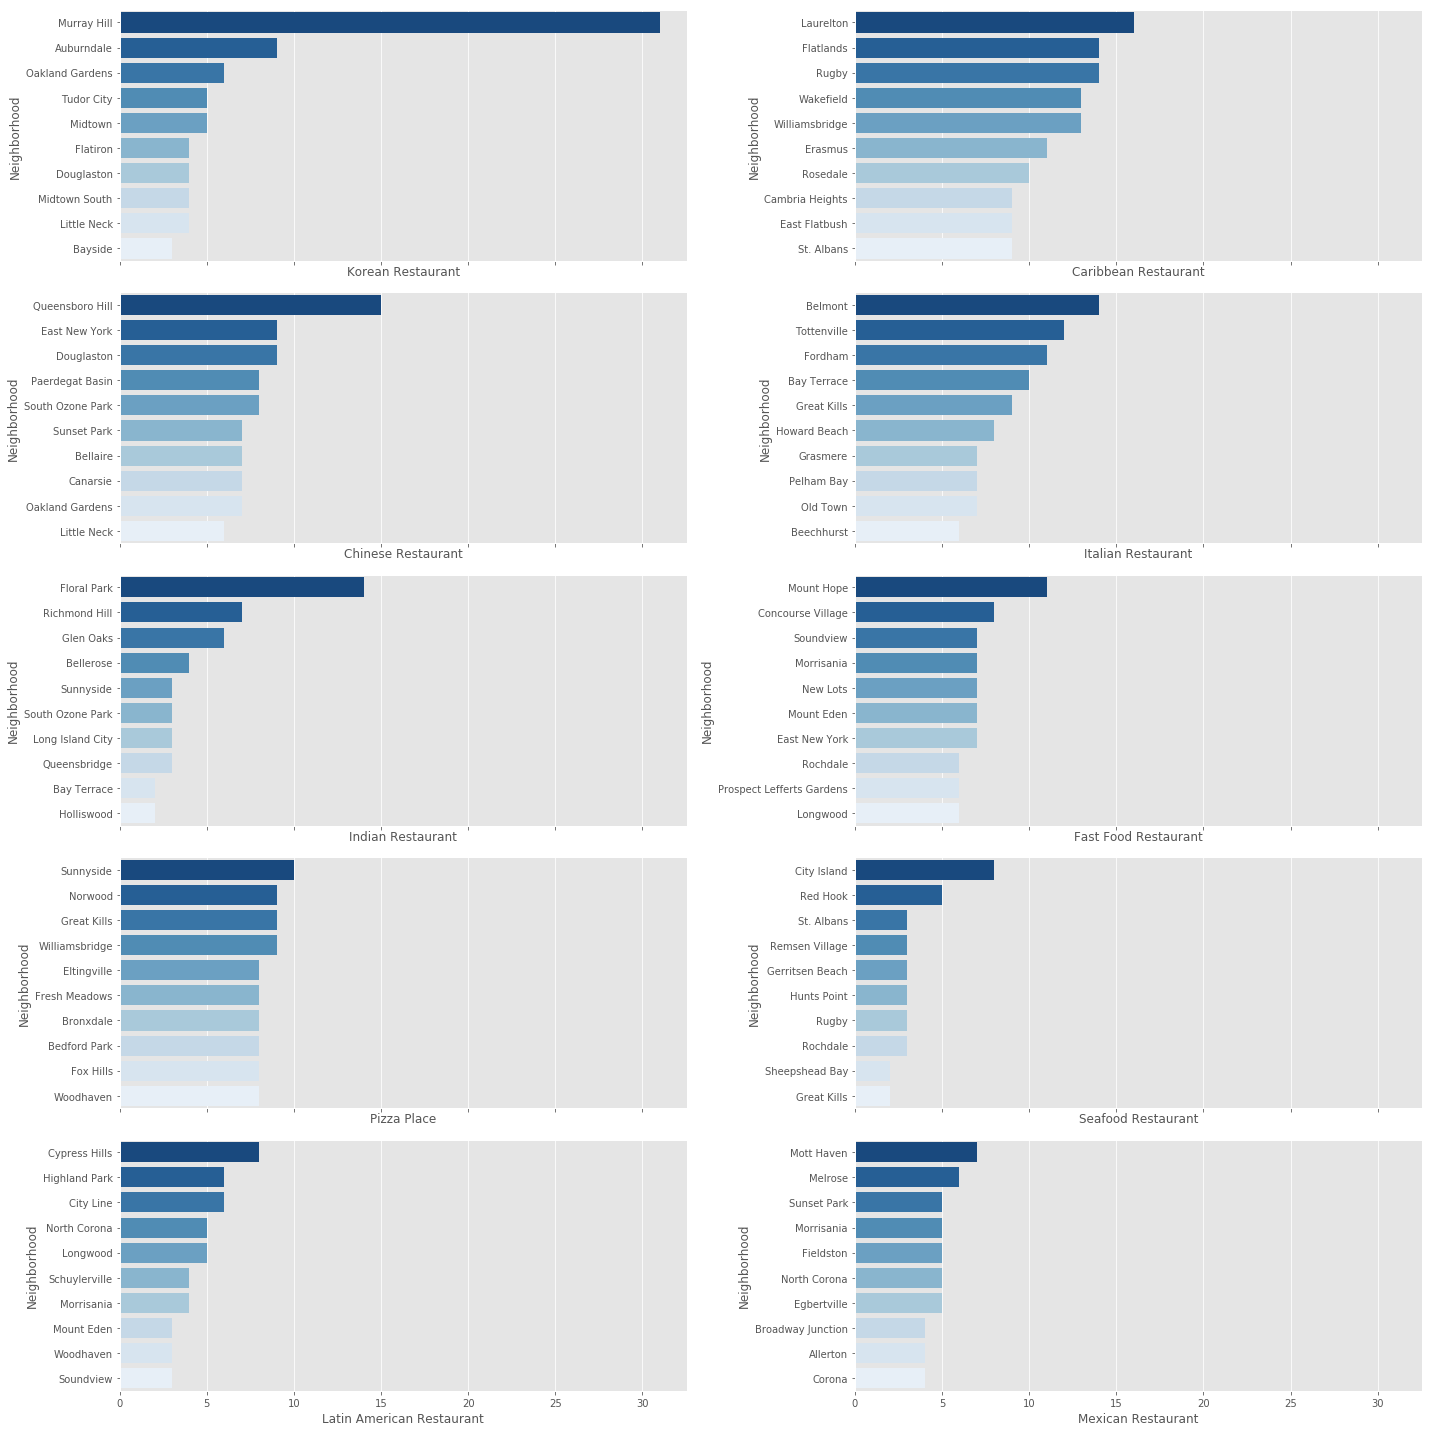

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes =plt.subplots(5, 2, figsize=(20,20), sharex=True)
axes = axes.flatten()

for ax, category in zip(axes, venue_top10_list):
    data = venue_counts[[category]].sort_values([category], ascending=False)[0:10]
    pal = sns.color_palette("Blues", len(data))
    sns.barplot(x=category, y=data.index, data=data, ax=ax, palette=np.array(pal[::-1]))

plt.tight_layout()
plt.show();

In [95]:

nyc_grouped = nyc_onehot.groupby('Neighborhood').mean().reset_index()
nyc_grouped.head()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Brazilian Restaurant,Burmese Restaurant,Burrito Place,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Colombian Restaurant,Cuban Restaurant,Dim Sum Restaurant,Dosa Place,Dumpling Restaurant,Dutch Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Food Service,French Restaurant,Fried Chicken Joint,German Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Himalayan Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Modern Greek Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,North Indian Restaurant,Office,Paella Restaurant,Pakistani Restaurant,Persian Restaurant,Peruvian Restaurant,Pizza Place,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Russian Restaurant,Salvadoran Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spanish Restaurant,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tibetan Restaurant,Tonkatsu Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Varenyky restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Whisky Bar
0,Allerton,0.0,0.0,0.047619,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.095238,0.0,0.095238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.190476,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.190476,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.047619,0.0,0.047619,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,Annadale,0.0,0.0,0.166667,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.055556,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.333333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,Arden Heights,0.0,0.0,0.157895,0.0,0.0,0.000000,0.0,0.0,0.052632,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.105263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.157895,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.105263,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.315789,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.105263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,Arlington,0.0,0.0,0.105263,0.0,0.0,0.052632,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.052632,0.0,0.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.157895,0.0,0.0,0.0,0.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.052632,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.105263,0.210526,0.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.105263,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,Arrochar,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.117647,0.0,0.0,0.0,0

In [96]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [97]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

In [98]:
# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = nyc_grouped['Neighborhood']

In [99]:
for ind in np.arange(nyc_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nyc_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Allerton,Pizza Place,Mexican Restaurant,Fast Food Restaurant,Fried Chicken Joint,Caribbean Restaurant
1,Annadale,Pizza Place,American Restaurant,Italian Restaurant,Sushi Restaurant,Japanese Restaurant
2,Arden Heights,Pizza Place,American Restaurant,Italian Restaurant,Mexican Restaurant,Chinese Restaurant
3,Arlington,Pizza Place,Fast Food Restaurant,American Restaurant,Peruvian Restaurant,Spanish Restaurant
4,Arrochar,Pizza Place,Italian Restaurant,Chinese Restaurant,Steakhouse,Latin American Restaurant


### Cluster Neighborhoods

Run k-means to count Neighborhoods for each cluster label for variable cluster size

In [100]:
nyc_grouped_clustering = nyc_grouped.drop('Neighborhood', 1)

In [101]:
sum_of_squared_distances = []
K = range(1,50)
for k in K:
    print(k, end=' ')
    kmeans = KMeans(n_clusters=k).fit(nyc_grouped_clustering)
    sum_of_squared_distances.append(kmeans.inertia_)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

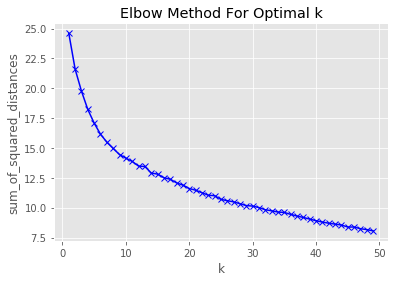

In [102]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal k');

In [103]:
# set number of clusters
kclusters = 8

# run k-means clustering
kmeans = KMeans(init="k-means++", n_clusters=kclusters, n_init=50).fit(nyc_grouped_clustering)

print(kmeans.labels_)

[5 0 0 5 0 2 1 6 1 1 3 1 6 5 1 2 0 1 6 2 6 0 6 2 1 1 0 3 5 3 5 1 0 5 0 3 4
 2 2 1 6 4 4 1 3 5 0 1 6 1 3 3 5 3 5 3 0 3 6 5 1 0 6 5 5 5 1 6 5 5 5 6 2 3
 3 1 0 4 1 2 5 3 1 4 4 0 6 6 1 1 0 0 4 2 1 1 5 1 4 1 2 6 3 3 1 1 0 0 3 2 1
 1 2 3 1 5 1 6 0 6 1 0 3 0 5 2 5 5 5 0 4 2 1 6 3 1 0 1 2 5 1 5 5 5 1 5 0 5
 5 4 1 6 7 3 6 3 2 1 5 1 1 6 1 0 6 3 2 5 6 1 0 5 0 0 3 1 0 6 1 2 5 6 5 5 5
 5 1 6 1 1 3 5 2 3 5 0 1 5 2 1 5 0 6 4 2 4 6 1 5 6 2 0 0 2 4 2 0 0 1 5 5 2
 2 1 1 1 3 1 4 2 6 6 1 0 5 1 2 1 6 4 0 0 4 0 1 2 1 6 2 3 2 5 0 4 2 1 2 1 4
 1 1 2 1 1 0 1 2 3 6 0 1 6 6 3 3 3 5 5 1 3 0 1 3 4 1 5 0 5 1 1 1 6 4 1 2 3
 4 0 4 0 1 1]


In [104]:
# add clustering labels
try:
    neighborhoods_venues_sorted.drop('Cluster Labels', axis=1)
except:
    neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [105]:
neighborhoods_venues_sorted.head(5)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,5,Allerton,Pizza Place,Mexican Restaurant,Fast Food Restaurant,Fried Chicken Joint,Caribbean Restaurant
1,0,Annadale,Pizza Place,American Restaurant,Italian Restaurant,Sushi Restaurant,Japanese Restaurant
2,0,Arden Heights,Pizza Place,American Restaurant,Italian Restaurant,Mexican Restaurant,Chinese Restaurant
3,5,Arlington,Pizza Place,Fast Food Restaurant,American Restaurant,Peruvian Restaurant,Spanish Restaurant
4,0,Arrochar,Pizza Place,Italian Restaurant,Chinese Restaurant,Steakhouse,Latin American Restaurant


Finally, let's visualize the resulting clusters

In [106]:
nyc_merged = neighborhoods_venues_sorted.join(neighborhoods.set_index('Neighborhood'), on='Neighborhood')
nyc_merged.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Borough,Latitude,Longitude
0,5,Allerton,Pizza Place,Mexican Restaurant,Fast Food Restaurant,Fried Chicken Joint,Caribbean Restaurant,Bronx,40.865788,-73.859319
1,0,Annadale,Pizza Place,American Restaurant,Italian Restaurant,Sushi Restaurant,Japanese Restaurant,Staten Island,40.538114,-74.178549
2,0,Arden Heights,Pizza Place,American Restaurant,Italian Restaurant,Mexican Restaurant,Chinese Restaurant,Staten Island,40.549286,-74.185887
3,5,Arlington,Pizza Place,Fast Food Restaurant,American Restaurant,Peruvian Restaurant,Spanish Restaurant,Staten Island,40.635325,-74.165104
4,0,Arrochar,Pizza Place,Italian Restaurant,Chinese Restaurant,Steakhouse,Latin American Restaurant,Staten Island,40.596313,-74.067124


In [107]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nyc_merged['Latitude'], nyc_merged['Longitude'], nyc_merged['Neighborhood'], nyc_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Clustering of Neighborhood

In [108]:

required_column_indices = [2,3,7]
required_column = [list(nyc_merged.columns.values)[i] for i in required_column_indices]
required_column_indices = [2,3,7]

Cluster 0

In [109]:
cluster_0 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 0, nyc_merged.columns[1:12]]
cluster_0.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Borough,Latitude,Longitude
1,Annadale,Pizza Place,American Restaurant,Italian Restaurant,Sushi Restaurant,Japanese Restaurant,Staten Island,40.538114,-74.178549
2,Arden Heights,Pizza Place,American Restaurant,Italian Restaurant,Mexican Restaurant,Chinese Restaurant,Staten Island,40.549286,-74.185887
4,Arrochar,Pizza Place,Italian Restaurant,Chinese Restaurant,Steakhouse,Latin American Restaurant,Staten Island,40.596313,-74.067124
16,Bedford Park,Pizza Place,Chinese Restaurant,Fast Food Restaurant,Fried Chicken Joint,Latin American Restaurant,Bronx,40.870185,-73.885512
21,Bellerose,Pizza Place,Indian Restaurant,American Restaurant,Chinese Restaurant,Halal Restaurant,Queens,40.728573,-73.720128


In [110]:
for col in required_column:
    print(cluster_0[col].value_counts(ascending = False))
    print("---------------------------------------------")

Pizza Place         45
Asian Restaurant     1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
American Restaurant     11
Italian Restaurant      10
Chinese Restaurant       7
Mexican Restaurant       4
Fast Food Restaurant     3
Japanese Restaurant      3
Asian Restaurant         2
BBQ Joint                2
Taco Place               1
Indian Restaurant        1
Sushi Restaurant         1
Pizza Place              1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Staten Island    23
Queens           14
Bronx             5
Brooklyn          4
Name: Borough, dtype: int64
---------------------------------------------


Cluster 1

In [111]:
cluster_1 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 1, nyc_merged.columns[1:12]]
cluster_1.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Borough,Latitude,Longitude
6,Astoria,Fast Food Restaurant,Pizza Place,Vietnamese Restaurant,American Restaurant,Ramen Restaurant,Queens,40.768509,-73.915654
8,Auburndale,Korean Restaurant,Greek Restaurant,Pizza Place,American Restaurant,Chinese Restaurant,Queens,40.761730,-73.791762
9,Bath Beach,Fast Food Restaurant,Japanese Restaurant,Sushi Restaurant,Vietnamese Restaurant,Cantonese Restaurant,Brooklyn,40.599519,-73.998752
11,Bay Ridge,American Restaurant,Fast Food Restaurant,Middle Eastern Restaurant,Pizza Place,Lebanese Restaurant,Brooklyn,40.625801,-74.030621
14,Bayside,Korean Restaurant,Asian Restaurant,Greek Restaurant,American Restaurant,Indian Restaurant,Queens,40.766041,-73.774274


In [112]:
for col in required_column:
    print(cluster_1[col].value_counts(ascending = False))
    print("---------------------------------------------")

Pizza Place                    32
Fast Food Restaurant            7
Italian Restaurant              7
Korean Restaurant               7
Indian Restaurant               4
Thai Restaurant                 4
American Restaurant             4
Sushi Restaurant                3
New American Restaurant         2
Ramen Restaurant                1
Seafood Restaurant              1
Eastern European Restaurant     1
Middle Eastern Restaurant       1
Greek Restaurant                1
Asian Restaurant                1
Taco Place                      1
Filipino Restaurant             1
Japanese Restaurant             1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
American Restaurant            12
Italian Restaurant             11
Fast Food Restaurant           10
Pizza Place                     9
New American Restaurant         6
Mexican Restaurant              4
Chinese Restaurant              3
Sushi Restaurant                2
Vietnamese Restaurant       

Cluster 2

In [115]:
cluster_2 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 2, nyc_merged.columns[1:12]]
cluster_2.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Borough,Latitude,Longitude
5,Arverne,Chinese Restaurant,Taco Place,American Restaurant,Pizza Place,Asian Restaurant,Queens,40.589144,-73.791992
15,Bayswater,Chinese Restaurant,Pizza Place,Fried Chicken Joint,American Restaurant,Fast Food Restaurant,Queens,40.611322,-73.765968
19,Bellaire,Chinese Restaurant,Pizza Place,Fast Food Restaurant,Italian Restaurant,American Restaurant,Queens,40.733014,-73.738892
23,Bensonhurst,Chinese Restaurant,Sushi Restaurant,Japanese Restaurant,Pizza Place,Fast Food Restaurant,Brooklyn,40.611009,-73.995180
37,Brownsville,Pizza Place,Fried Chicken Joint,Caribbean Restaurant,Chinese Restaurant,American Restaurant,Brooklyn,40.663950,-73.910235


In [116]:
for col in required_column:
    print(cluster_2[col].value_counts(ascending = False))
    print("---------------------------------------------")

Chinese Restaurant      22
Pizza Place              7
American Restaurant      3
Caribbean Restaurant     2
Seafood Restaurant       1
Indian Restaurant        1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Chinese Restaurant      11
Pizza Place              8
Mexican Restaurant       3
Italian Restaurant       2
Dumpling Restaurant      2
Caribbean Restaurant     2
Taco Place               2
Fried Chicken Joint      2
American Restaurant      1
Sushi Restaurant         1
Fast Food Restaurant     1
Korean Restaurant        1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Queens           20
Brooklyn          7
Staten Island     5
Bronx             3
Manhattan         1
Name: Borough, dtype: int64
---------------------------------------------


Cluster 3

In [117]:
cluster_3 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 3, nyc_merged.columns[1:12]]
cluster_3.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Borough,Latitude,Longitude
10,Battery Park City,American Restaurant,Pizza Place,New American Restaurant,French Restaurant,Fast Food Restaurant,Manhattan,40.711932,-74.016869
27,Boerum Hill,American Restaurant,Chinese Restaurant,BBQ Joint,Middle Eastern Restaurant,Seafood Restaurant,Brooklyn,40.685683,-73.983748
29,Breezy Point,American Restaurant,Pizza Place,Whisky Bar,Greek Restaurant,Ethiopian Restaurant,Queens,40.557401,-73.925512
35,Brooklyn Heights,American Restaurant,Pizza Place,French Restaurant,Seafood Restaurant,Korean Restaurant,Brooklyn,40.695864,-73.993782
44,Carroll Gardens,American Restaurant,Italian Restaurant,French Restaurant,BBQ Joint,Pizza Place,Brooklyn,40.680540,-73.994654


In [118]:
for col in required_column:
    print(cluster_3[col].value_counts(ascending = False))
    print("---------------------------------------------")

American Restaurant    23
Pizza Place             3
Italian Restaurant      2
French Restaurant       2
Seafood Restaurant      2
Ramen Restaurant        1
Korean Restaurant       1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
American Restaurant          9
Pizza Place                  6
Italian Restaurant           5
Dim Sum Restaurant           3
Ramen Restaurant             2
Chinese Restaurant           2
French Restaurant            1
Fast Food Restaurant         1
Taco Place                   1
South American Restaurant    1
Asian Restaurant             1
Seafood Restaurant           1
Korean Restaurant            1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Manhattan        17
Brooklyn         10
Queens            3
Bronx             2
Staten Island     2
Name: Borough, dtype: int64
---------------------------------------------


Cluster 4

In [119]:
cluster_4 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 4, nyc_merged.columns[1:12]]
cluster_4.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Borough,Latitude,Longitude
36,Brookville,Fried Chicken Joint,Caribbean Restaurant,Pizza Place,Chinese Restaurant,Fast Food Restaurant,Queens,40.660003,-73.751753
41,Cambria Heights,Caribbean Restaurant,Fried Chicken Joint,Seafood Restaurant,African Restaurant,Fast Food Restaurant,Queens,40.692775,-73.735269
42,Canarsie,Caribbean Restaurant,Chinese Restaurant,Fast Food Restaurant,Pizza Place,Mexican Restaurant,Brooklyn,40.635564,-73.902093
77,East Flatbush,Caribbean Restaurant,Fried Chicken Joint,Chinese Restaurant,American Restaurant,Fast Food Restaurant,Brooklyn,40.641718,-73.936103
83,Eastchester,Caribbean Restaurant,Pizza Place,Chinese Restaurant,Fast Food Restaurant,Mexican Restaurant,Bronx,40.887556,-73.827806


In [120]:
for col in required_column:
    print(cluster_4[col].value_counts(ascending = False))
    print("---------------------------------------------")

Caribbean Restaurant    20
American Restaurant      1
Fried Chicken Joint      1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Pizza Place             7
Fast Food Restaurant    6
Chinese Restaurant      4
Fried Chicken Joint     2
Caribbean Restaurant    1
Seafood Restaurant      1
American Restaurant     1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Brooklyn         8
Queens           7
Bronx            6
Staten Island    1
Name: Borough, dtype: int64
---------------------------------------------


Cluster 5 

In [121]:
cluster_5 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 5, nyc_merged.columns[1:12]]
cluster_5.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Borough,Latitude,Longitude
0,Allerton,Pizza Place,Mexican Restaurant,Fast Food Restaurant,Fried Chicken Joint,Caribbean Restaurant,Bronx,40.865788,-73.859319
3,Arlington,Pizza Place,Fast Food Restaurant,American Restaurant,Peruvian Restaurant,Spanish Restaurant,Staten Island,40.635325,-74.165104
13,Baychester,Fast Food Restaurant,Pizza Place,Chinese Restaurant,Caribbean Restaurant,American Restaurant,Bronx,40.866858,-73.835798
28,Borough Park,Fast Food Restaurant,Pizza Place,Dumpling Restaurant,Sushi Restaurant,Chinese Restaurant,Brooklyn,40.633131,-73.990498
30,Briarwood,Fast Food Restaurant,Pizza Place,Fried Chicken Joint,Japanese Restaurant,Caribbean Restaurant,Queens,40.710935,-73.811748


In [122]:
for col in required_column:
    print(cluster_5[col].value_counts(ascending = False))
    print("---------------------------------------------")

Fast Food Restaurant               25
Pizza Place                        13
Latin American Restaurant           3
Chinese Restaurant                  3
Mexican Restaurant                  2
Fried Chicken Joint                 2
Caribbean Restaurant                1
Spanish Restaurant                  1
Southern / Soul Food Restaurant     1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Fast Food Restaurant         14
Pizza Place                  12
Caribbean Restaurant          7
Mexican Restaurant            5
Fried Chicken Joint           5
Latin American Restaurant     3
Chinese Restaurant            3
Ethiopian Restaurant          1
Colombian Restaurant          1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Bronx            24
Brooklyn         14
Queens            7
Staten Island     3
Manhattan         3
Name: Borough, dtype: int64
---------------------------------------------


Cluster 6 

In [123]:
cluster_6 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 6, nyc_merged.columns[1:12]]
cluster_6.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Borough,Latitude,Longitude
7,Astoria Heights,Greek Restaurant,Italian Restaurant,Pizza Place,Chinese Restaurant,Fried Chicken Joint,Queens,40.770317,-73.894680
12,Bay Terrace,Italian Restaurant,Pizza Place,Asian Restaurant,American Restaurant,Chinese Restaurant,Queens,40.782843,-73.776802
12,Bay Terrace,Italian Restaurant,Pizza Place,Asian Restaurant,American Restaurant,Chinese Restaurant,Staten Island,40.553988,-74.139166
18,Beechhurst,Italian Restaurant,Pizza Place,Japanese Restaurant,Chinese Restaurant,Vietnamese Restaurant,Queens,40.792781,-73.804365
20,Belle Harbor,Mexican Restaurant,Italian Restaurant,BBQ Joint,Chinese Restaurant,Seafood Restaurant,Queens,40.576156,-73.854018


In [124]:
for col in required_column:
    print(cluster_6[col].value_counts(ascending = False))
    print("---------------------------------------------")

Italian Restaurant      27
Pizza Place              5
Mexican Restaurant       2
Chinese Restaurant       1
Greek Restaurant         1
Fast Food Restaurant     1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Pizza Place                15
Italian Restaurant         10
Chinese Restaurant          3
Mexican Restaurant          3
Fast Food Restaurant        3
Asian Restaurant            1
Thai Restaurant             1
New American Restaurant     1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Staten Island    16
Queens            9
Bronx             7
Brooklyn          3
Manhattan         2
Name: Borough, dtype: int64
---------------------------------------------


Cluster 7

In [125]:
cluster_7 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 7, nyc_merged.columns[1:12]]
cluster_7.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Borough,Latitude,Longitude
152,Lighthouse Hill,Italian Restaurant,Whisky Bar,Greek Restaurant,English Restaurant,Ethiopian Restaurant,Staten Island,40.576506,-74.137927


In [126]:
for col in required_column:
    print(cluster_7[col].value_counts(ascending = False))
    print("---------------------------------------------")

Italian Restaurant    1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Whisky Bar    1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Staten Island    1
Name: Borough, dtype: int64
---------------------------------------------
